In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
DATADIR = "C:/Users/Rawan/Desktop/Classification-Flutter-TFlite-master/Currency/"
CATEGORIE = ["5", "10", "20", "50", "100", "200"]
CLASSES = {
    '1': 0,
    '5': 1,
    '10': 2,
    '20': 3,
    '50': 4,
    '100': 5,
    '200': 6
}

In [4]:
dataset = []

for cat in os.listdir(DATADIR):
    path = os.path.join(DATADIR, cat)
    for img_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_path))
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        
        lab = CLASSES[cat]
        dataset.append([img, lab])

random.seed(42)
random.shuffle(dataset)

data = []
labels = []

for d, l in dataset:
    data.append(d)
    labels.append(l)

data = np.array(data)
labels = np.array(labels)
    
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (901, 128, 128, 3)
Labels shape: (901,)


In [5]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(720, 128, 128, 3)
(720,)
(181, 128, 128, 3)
(181,)


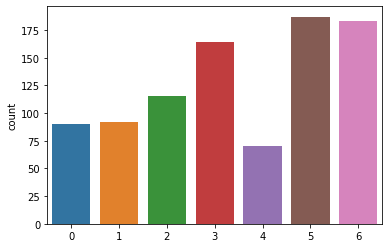

In [6]:
import seaborn as sns

sns.countplot(x=labels);

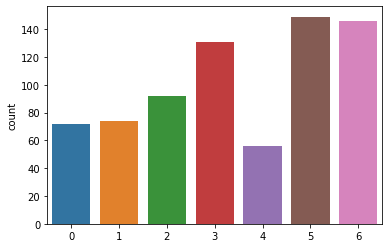

In [7]:
sns.countplot(x=trainY);

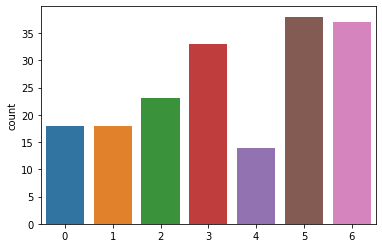

In [8]:
sns.countplot(x=testY);

In [9]:
model= Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape = data.shape[1:]))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same'))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), padding='same'))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.5))

model.add(Dense(len(CLASSES)))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, 
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, 
                         horizontal_flip=True, fill_mode="nearest")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       2

In [10]:
EPOCHS = 60

H = model.fit(aug.flow(trainX, trainY, batch_size=32), 
             validation_data=(testX, testY), 
             steps_per_epoch=len(trainX) // 32,
             epochs=EPOCHS, verbose=1)

#H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, verbose=1)

Epoch 1/60
22/22 [==============================] - 43s 2s/step - loss: 2.6244 - accuracy: 0.2043 - val_loss: 1.9221 - val_accuracy: 0.2652
Epoch 2/60
22/22 [==============================] - 34s 2s/step - loss: 1.9022 - accuracy: 0.2036 - val_loss: 1.8270 - val_accuracy: 0.2155
Epoch 3/60
22/22 [==============================] - 34s 2s/step - loss: 1.8213 - accuracy: 0.2347 - val_loss: 1.7071 - val_accuracy: 0.3536
Epoch 4/60
22/22 [==============================] - 35s 2s/step - loss: 1.7756 - accuracy: 0.2600 - val_loss: 1.6815 - val_accuracy: 0.3370
Epoch 5/60
22/22 [==============================] - 34s 2s/step - loss: 1.7750 - accuracy: 0.2781 - val_loss: 1.6082 - val_accuracy: 0.3923
Epoch 6/60
22/22 [==============================] - 34s 2s/step - loss: 1.6951 - accuracy: 0.3124 - val_loss: 1.6040 - val_accuracy: 0.3646
Epoch 7/60
22/22 [==============================] - 34s 2s/step - loss: 1.6557 - accuracy: 0.3368 - val_loss: 1.5086 - val_accuracy: 0.4033
Epoch 8/60
22/22 [==

22/22 [==============================] - 40s 2s/step - loss: 0.7752 - accuracy: 0.7261 - val_loss: 1.1836 - val_accuracy: 0.7017
Epoch 60/60
22/22 [==============================] - 39s 2s/step - loss: 0.7560 - accuracy: 0.7217 - val_loss: 1.0066 - val_accuracy: 0.6961


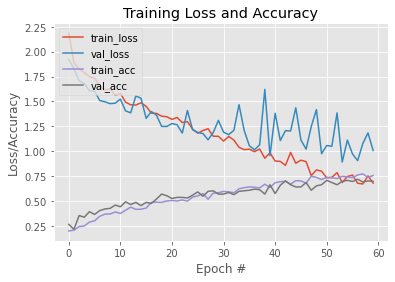

In [11]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left");

In [12]:
from sklearn.metrics import classification_report

preds = model.predict(testX)
predIdxs = np.argmax(preds, axis=1)

print(classification_report(testY, predIdxs, target_names=CLASSES.keys()))

              precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           5       0.40      0.22      0.29        18
          10       0.77      0.43      0.56        23
          20       0.79      0.58      0.67        33
          50       0.55      0.86      0.67        14
         100       0.65      0.92      0.76        38
         200       0.74      0.84      0.78        37

    accuracy                           0.70       181
   macro avg       0.69      0.67      0.66       181
weighted avg       0.70      0.70      0.68       181



In [13]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('C:/Users/Rawan/Desktop/Classification-Flutter-TFlite-master/assets/model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Rawan\AppData\Local\Temp\tmp_m_ltb1f\assets
